In [12]:
# pip install sdv
# https://colab.research.google.com/drive/1F3WWduNjcX4oKck6XkjlwZ9zIsWlTGEM?usp=sharing
# https://docs.sdv.dev/sdv/demos

In [1]:
import pandas as pd
import os
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
import sweetviz as sv


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import plotly.io as pio
pio.renderers.default = 'vscode'  # или 'vscode'


In [3]:
# df_full = pd.read_excel(r'C:\Nikolas\Intership\Композитные материалы\Datasets\Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР\Origin.xlsx')

import pandas as pd
file_path = r'C:\Nikolas\Intership\Композитные материалы\Datasets\Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР\Origin.xlsx'
df_default = pd.read_excel(file_path)

df_default.columns

Index(['Наименование компонентов Состав. %',
       'Блок-сополимер пропилена с этиленом PP I120 GP 5',
       'Блок-сополимер пропилена с этиленом SIBEX PP T192 IM 5',
       'Блок-сополимер пропилена с этиленом SIBEX PP T122 IM 5',
       'Блок-сополимер пропилена с этиленом SIBEX PP I452 IM 5',
       'Блок-сополимер пропилена с этиленом SIBEX PP I602 IM 5',
       'Блок-сополимер пропилена с этиленом Bormod BJ368MO',
       'Блок-сополимер пропилена с этиленом Bormod BJ998MO',
       'Статистический сополимер пропилена с этиленом SIBEX PP R003 EX 1',
       'Модификатор Хайфэкс (Hifax) X 1956 A', 'Модификатор PP 01-ATS',
       'Модификатор PP M017 AS', 'Модификатор A-669K',
       'Полиолефиновый эластомер Люцен (LUCENE) LC168',
       'Полиолефиновый эластомер Lucene LС 170',
       'Полиолефиновый эластомер Lucene LС 670',
       'Полиолефиновый эластомер Engage 58750',
       'Полиолефиновый эластомер Solumer 871',
       'Полиолефиновый эластомер Solumer 875', 'Тальк Luzenac A

# Data observe + ETL

In [4]:
df_default['Усадка средняя на образце 60х60х2 мм. 50 МПа. %'] = pd.to_numeric(df_default['Усадка средняя на образце 60х60х2 мм. 50 МПа. %'], errors='coerce')
# Report generating via Sweetviz
report = sv.analyze(df_default)

# HTML-report
report.show_html('Report.html')


[Summarizing dataframe]                      |          | [  0%]   00:00 -> (? left)

Feature: Ударная вязкость по Шарпи на образцах с чести. %|████████  | [ 81%]   00:07 -> (00:02 left)                
Feature: Ударная вязкость по Шарпи на образцах с 1%]   00:07 -> (00:02 left)
Feature: Ударная вязкость по Шарпи на образцах с 3%]   00:07 -> (00:02 left)
Feature: Ударная вязкость по Шарпи на образцах с 3%]   00:07 -> (00:02 left)
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:03 -> (00:00 left)                                              


Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
# Copy the first column to preserve its original format
first_column = df_default.iloc[:, 0]

# Convert remaining columns to number format
df_numeric = df_default.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Calculate the median for each column
# medians = df_numeric.median()

# Replacing NaN with median
# df_numeric.fillna(medians, inplace=True)

# Replacing NaN with 0
df_numeric.fillna(0, inplace=True)

# Join the first column back with the rest of the DataFrame
df_modified = pd.concat([first_column, df_numeric], axis=1)

# Checking the result
df_modified.head()

,Наименование компонентов Состав. %,Блок-сополимер пропилена с этиленом PP I120 GP 5,Блок-сополимер пропилена с этиленом SIBEX PP T192 IM 5,Блок-сополимер пропилена с этиленом SIBEX PP T122 IM 5,Блок-сополимер пропилена с этиленом SIBEX PP I452 IM 5,Блок-сополимер пропилена с этиленом SIBEX PP I602 IM 5,Блок-сополимер пропилена с этиленом Bormod BJ368MO,Блок-сополимер пропилена с этиленом Bormod BJ998MO,Статистический сополимер пропилена с этиленом SIBEX PP R003 EX 1,Модификатор Хайфэкс (Hifax) X 1956 A,...,"Ударная вязкость по Шарпи на образцах с \nнадрезом ""в ребро"". +23°С. кДж м2","Ударная вязкость по Шарпи на образцах с \nнадрезом ""в ребро"". -40°С. кДж м2",Модуль упругости при изгибе. МПа,Темпертура изгиба под нагрузкой. 1.8 МПа. °С,Температура изгиба под нагрузкой (предварительный отжиг 90°С 30 мин). 1.8 МПа. °С,Температура изгиба под нагрузкой. 0.45 МПа. °С,Температура изгиба под нагрузкой (предварительный отжиг 90°С 30 мин). 0.45 МПа. °С,Температура размягчения по Вика . 50 Н. °С,Усадка средняя на образце 60х60х2 мм. 50 МПа. %,"Внешний вид ""тигровые полосы"". балл (от 1 до 5. где 1 - NOK. 5 - OK)"
0,Состав 1,5,0,0.0,62.85,0,0,0,0,10.0,...,48.9,5.2,1251.0,51.0,0.0,88.0,0.0,53.0,1.02,5
1,Состав 2,5,0,0.0,62.85,0,0,0,0,10.0,...,42.4,5.0,1208.0,53.0,57.0,97.0,107.0,55.0,1.01,5
2,Состав 3,5,0,0.0,62.85,0,0,0,0,10.0,...,49.0,4.9,1190.0,0.0,63.0,0.0,107.0,58.0,1.01,5
3,Состав 4,15,0,0.0,56.00,0,0,0,0,7.0,...,20.0,5.6,1244.0,0.0,64.0,0.0,0.0,0.0,0.94,5
4,Состав 5,0,38,0.0,38.00,0,0,0,0,7.0,...,51.2,5.2,1156.0,0.0,66.0,0.0,0.0,0.0,1.08,4


In [6]:
# Modifying fields
# df_modified['Наименование компонентов Состав. %'] = df_modified['Наименование компонентов Состав. %'].replace('Состав', 'Component', regex=True)
df_modified = df_modified.drop('Наименование компонентов Состав. %', axis=1)

# Генерируем новые названия столбцов
component_names = [f"component_{i+1}" for i in range(34)]  # для первых 34 столбцов
metric_names = [f"target_{i-33}" for i in range(34, len(df_modified.columns))]  # для остальных столбцов

# Применяем новые названия столбцов
new_column_names = component_names + metric_names
df_modified.columns = new_column_names

# Путь для сохранения файлов
output_folder = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Splited datasets'
os.makedirs(output_folder, exist_ok=True)  # Создаем папку, если она не существует

# Сохраняем каждый "метрический" DataFrame
for i, metric_name in enumerate(metric_names, start=34):
    # Собираем новый DataFrame
    base_columns = df_modified.iloc[:, :34]  # Первые 34 столбцов
    current_metric_column = df_modified.iloc[:, i]
    new_df = pd.concat([base_columns, current_metric_column], axis=1)

    # Сохраняем DataFrame в CSV
    filename = f"{metric_name}.csv"
    file_path = os.path.join(output_folder, filename)
    new_df.to_csv(file_path, index=False)
    
    # Выводим информацию о сохранении файла
    print(f"DataFrame for '{metric_name}' saved to '{file_path}'.")

DataFrame for 'target_1' saved to 'C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Splited datasets\target_1.csv'.
DataFrame for 'target_2' saved to 'C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Splited datasets\target_2.csv'.
DataFrame for 'target_3' saved to 'C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Splited datasets\target_3.csv'.
DataFrame for 'target_4' saved to 'C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Splited datasets\target_4.csv'.
DataFrame for 'target_5' saved to 'C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Splited datasets\target_5.csv'.
DataFrame for 'target_6' saved to 'C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компа

# Dataset generating sample

In [3]:
# dataset = pd.read_csv('df for generation data.csv', delimiter=',')
df_full = pd.read_csv('C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Splited datasets/target_1.csv', delimiter=',')
df_target = df_full.iloc[:,-1:]
df = df_full.iloc[:,:-1]
df_target.columns = ['Target']


In [65]:
df.head(2)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_26,component_27,component_28,component_29,component_30,component_31,component_32,component_33,component_34,component_35
0,5,0,0.0,62.85,0,0,0,0,10.0,0,...,0,0.2,0.15,0.1,0,0.2,1.5,0.0,0.0,15.1
1,5,0,0.0,62.85,0,0,0,0,10.0,0,...,0,0.2,0.15,0.1,0,0.2,1.5,0.0,0.0,14.9


In [66]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [67]:
metadata.detect_from_dataframe(data=df)

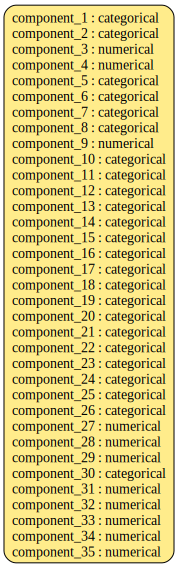

In [68]:
metadata.visualize()

In [69]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(metadata, name='FAST_ML')
synthesizer.fit(data=df)

In [70]:
synthetic_data = synthesizer.sample(num_rows=10000)

In [71]:
synthetic_data.head(-5)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_26,component_27,component_28,component_29,component_30,component_31,component_32,component_33,component_34,component_35
0,0,0,30.532223,36.488638,0,0,0,7,1.566539,0,...,0,0.154264,0.15,0.008534,0,0.2,0.000000,0.947500,0.634700,14.389752
1,0,0,6.765455,46.341212,0,0,0,0,6.847742,0,...,0,0.173567,0.15,0.047136,0,0.2,0.016129,0.638226,0.439173,15.677448
2,0,29,0.000000,48.142897,0,0,0,0,6.862151,0,...,0,0.157746,0.15,0.015488,0,0.2,0.111926,1.500000,0.000000,15.086908
3,0,29,27.990681,58.854297,0,0,0,0,1.567811,7,...,0,0.167997,0.15,0.035985,0,0.2,0.443410,0.161353,0.329228,17.355007
4,30,0,21.636654,43.491717,0,0,0,0,3.479064,0,...,0,0.150000,0.15,0.000000,0,0.2,0.000000,1.500000,0.157438,17.107625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,0,0,27.223160,45.576203,0,0,0,0,3.342819,0,...,0,0.150000,0.15,0.000000,0,0.2,0.000000,1.500000,0.074193,15.021400
9991,0,0,8.777610,61.203304,0,0,0,0,9.457283,0,...,0,0.168521,0.15,0.037061,0,0.2,0.157154,0.876717,0.567664,13.961173
9992,0,0,27.413429,44.356389,0,0,0,0,3.629604,0,...,0,0.150000,0.15,0.000000,0,0.2,0.000000,1.419966,0.088757,15.534451
9993,0,0,15.859827,54.645358,0,0,0,0,3.482056,7,...,0,0.155957,0.15,0.011915,0,0.2,0.198033,1.500000,0.000000,16.800837


In [72]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    df,
    synthetic_data,
    metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 595/595 [00:11<00:00, 51.72it/s]

Overall Score: 84.56%

Properties:
- Column Shapes: 89.3%
- Column Pair Trends: 79.82%


In [73]:
quality_report.get_visualization('Column Shapes')

In [ ]:
synthetic_data.to_csv('train_composit.csv', index=False, encoding='utf-8')

# Dataset generating for each target

In [7]:
import pandas as pd
import os
from sdv.metadata import SingleTableMetadata
from sdv.lite import SingleTablePreset
from sdv.evaluation.single_table import evaluate_quality

In [8]:
def process_csv_files(input_folder, output_folder):
    """
    Функция загружает CSV файлы из указанной папки, обрабатывает их и сохраняет в другую папку.
    
    Args:
    input_folder (str): Путь к папке с исходными CSV файлами.
    output_folder (str): Путь к папке для сохранения обработанных файлов.
    """
    # Создаем папку для выходных данных, если она не существует
    os.makedirs(output_folder, exist_ok=True)
    
    # Получаем список CSV файлов в папке
    for filename in os.listdir(input_folder):
        if filename.endswith('.csv'):
            file_path = os.path.join(input_folder, filename)
            df = pd.read_csv(file_path)  # Используем переменную df
            
            processed_df = synthetic_data(df)  # Передаем df в функцию
            
            new_filename = filename.replace('target', 'synthetic_target')
            processed_file_path = os.path.join(output_folder, new_filename)
            
            processed_df.to_csv(processed_file_path, index=False)
            print(f"File saved: {processed_file_path}")

def synthetic_data(df):
    """
    Пример функции обработки данных.
    Здесь можно добавить свою логику обработки данных.
    
    Args:
    df (pd.DataFrame): DataFrame для обработки.
    
    Returns:
    pd.DataFrame: Обработанный DataFrame.
    """
  
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(data=df)

    synthesizer = SingleTablePreset(metadata, name='FAST_ML')
    synthesizer.fit(data=df)
    synthetic_data = synthesizer.sample(num_rows=10000)

    return synthetic_data

# Пример использования функции
input_folder = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Splited datasets'
output_folder = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Generated datasets'
process_csv_files(input_folder, output_folder)


File saved: C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Generated datasets\real_data_with_predictions.csv
File saved: C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Generated datasets\synthetic_target_1.csv
File saved: C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Generated datasets\synthetic_target_10.csv
File saved: C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Generated datasets\synthetic_target_11.csv
File saved: C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Generated datasets\synthetic_target_12.csv
File saved: C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Generated datasets\synthetic_

# Training all targets

In [14]:
import os
import pandas as pd
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# pip install tpot

In [17]:
import os
import pandas as pd
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def automl_process(input_folder, output_folder):
    """
    Функция загружает CSV файлы из указанной папки, применяет AutoML с использованием TPOT для регрессионных задач и сохраняет метрики в одну таблицу.
    """
    os.makedirs(output_folder, exist_ok=True)  # Создаем папку для результатов, если не существует

    metrics_list = []  # Список для хранения метрик

    for filename in os.listdir(input_folder):
        if filename.endswith('.csv'):
            file_path = os.path.join(input_folder, filename)
            df = pd.read_csv(file_path)

            # Предполагаем, что последний столбец - это целевая переменная
            X = df.iloc[:, :-1]
            y = df.iloc[:, -1]

            # Разбиваем данные на обучающую и тестовую выборки
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Инициализация и запуск TPOT
            tpot = TPOTRegressor(generations=25, population_size=50, verbosity=2, random_state=42)
            tpot.fit(X_train, y_train)

            # Предсказания на тестовом наборе
            y_pred = tpot.predict(X_test)

            # Вычисление метрик
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Добавление метрик в список
            metrics_list.append({
                'Filename': filename,
                'MSE': mse,
                'R2': r2
            })

    # Создание DataFrame из списка метрик и сохранение в CSV файл
    metrics_df = pd.DataFrame(metrics_list)
    metrics_path = os.path.join(output_folder, 'all_metrics.csv')
    metrics_df.to_csv(metrics_path, index=False)
    print(f"Все метрики сохранены в {metrics_path}")

# Пример использования функции
input_folder = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Generated datasets'
output_folder = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Датасет Компаунд ПП-02_версия 1_ТХП_21.05.2024.xlsx - 01_НИР/Generated datasets'
automl_process(input_folder, output_folder)


                                                                                
Generation 1 - Current best internal CV score: -0.3258948970524661
                                                                                 
Generation 2 - Current best internal CV score: -0.3258948970524661
                                                                                 
Generation 3 - Current best internal CV score: -0.3258948970524661
                                                                                 
Generation 4 - Current best internal CV score: -0.32552509298237614
                                                                                 
Generation 5 - Current best internal CV score: -0.32552509298237614
                                                                                 
Generation 6 - Current best internal CV score: -0.32552509298237614
                                                                                 
Generation 7 - Current

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RidgeCV was fitted with feature names



                                                                                 
Generation 1 - Current best internal CV score: -0.009559987216581188
                                                                                 
Generation 2 - Current best internal CV score: -0.009559922243204861
                                                                                 
Generation 3 - Current best internal CV score: -0.009559922243204861
                                                                                 
Generation 4 - Current best internal CV score: -0.00944626256602552
                                                                                 
Generation 5 - Current best internal CV score: -0.009446056137396573
                                                                                 
Generation 6 - Current best internal CV score: -0.009446056137396573
                                                                                 
Generation 7 

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RidgeCV was fitted with feature names



                                                                                 
Generation 1 - Current best internal CV score: -2.4931557638640795e-05
                                                                                 
Generation 2 - Current best internal CV score: -2.4931557638640795e-05
                                                                                 
Generation 3 - Current best internal CV score: -2.4913858509532504e-05
                                                                               
Generation 4 - Current best internal CV score: -2.4913858509532504e-05
                                                                                 
Generation 5 - Current best internal CV score: -2.4913858509532504e-05
                                                                               
Generation 6 - Current best internal CV score: -2.4913858509532504e-05
                                                                                 
Gene

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RidgeCV was fitted with feature names



                                                                                
Generation 1 - Current best internal CV score: -0.29913371607312983
                                                                                 
Generation 2 - Current best internal CV score: -0.2991108906087692
                                                                                 
Generation 3 - Current best internal CV score: -0.29887337616366627
                                                                                 
Generation 4 - Current best internal CV score: -0.29887337616366627
                                                                                 
Generation 5 - Current best internal CV score: -0.2988733476868552
                                                                                 
Generation 6 - Current best internal CV score: -0.2988733476868552
                                                                                 
Generation 7 - Current

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RidgeCV was fitted with feature names



                                                                                
Generation 1 - Current best internal CV score: -10383.686285863147
                                                                                 
Generation 2 - Current best internal CV score: -10167.647912431677
                                                                                 
Generation 3 - Current best internal CV score: -10167.647912431677
                                                                                 
Generation 4 - Current best internal CV score: -10129.596392724648
                                                                                 
Generation 5 - Current best internal CV score: -10129.596392724648
                                                                                 
Generation 6 - Current best internal CV score: -10129.596392724648
                                                                                 
Generation 7 - Current be

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RidgeCV was fitted with feature names



                                                                                
Generation 1 - Current best internal CV score: -0.9972959801323913
                                                                                 
Generation 2 - Current best internal CV score: -0.9972959801323913
                                                                                 
Generation 3 - Current best internal CV score: -0.9959219199694325
                                                                                 
Generation 4 - Current best internal CV score: -0.9959219199694325
                                                                                 
Generation 5 - Current best internal CV score: -0.9959219199694325
                                                                                 
Generation 6 - Current best internal CV score: -0.9959219199694325
                                                                               
Generation 7 - Current best

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but ElasticNetCV was fitted with feature names

